<a href="https://colab.research.google.com/github/SamDurga2507/Traffic-management-project/blob/main/Traffic_control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()


Saving datasets_8494_11879_test_BdBKkAj.csv to datasets_8494_11879_test_BdBKkAj (1).csv


In [5]:
import pandas as pd
df=pd.read_csv('datasets_8494_11879_test_BdBKkAj.csv',encoding='utf-8')

In [57]:
df.tail()

,Junction,ID,Date,Time,Day,Hour,Traffic_Volume,Emergency_Vehicles,Green_Timeout
11803,4,20171031194,2017-10-31,19:00:00,Tuesday,19,1,0,20.0
11804,4,20171031204,2017-10-31,20:00:00,Tuesday,20,1,0,20.0
11805,4,20171031214,2017-10-31,21:00:00,Tuesday,21,1,0,20.0
11806,4,20171031224,2017-10-31,22:00:00,Tuesday,22,1,0,20.0
11807,4,20171031234,2017-10-31,23:00:00,Tuesday,23,1,0,20.0


In [7]:
df.describe()

,Junction,ID
count,11808.000000,1.180800e+04
mean,2.500000,2.017087e+10
std,1.118081,1.124665e+05
min,1.000000,2.017070e+10
25%,1.750000,2.017073e+10
50%,2.500000,2.017083e+10
75%,3.250000,2.017100e+10
max,4.000000,2.017103e+10


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11808 entries, 0 to 11807
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  11808 non-null  object
 1   Junction  11808 non-null  int64 
 2   ID        11808 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 276.9+ KB


In [9]:
print(df.isnull().sum())

DateTime    0
Junction    0
ID          0
dtype: int64


In [10]:
df['Date']=df['DateTime'].str.split(' ').str[0]
df['Time']=df['DateTime'].str.split(' ').str[1]

In [11]:
df.head()

,DateTime,Junction,ID,Date,Time
0,2017-07-01 00:00:00,1,20170701001,2017-07-01,00:00:00
1,2017-07-01 01:00:00,1,20170701011,2017-07-01,01:00:00
2,2017-07-01 02:00:00,1,20170701021,2017-07-01,02:00:00
3,2017-07-01 03:00:00,1,20170701031,2017-07-01,03:00:00
4,2017-07-01 04:00:00,1,20170701041,2017-07-01,04:00:00


In [12]:
df.drop(['DateTime'],axis=1,inplace=True)

In [13]:
df

,Junction,ID,Date,Time
0,1,20170701001,2017-07-01,00:00:00
1,1,20170701011,2017-07-01,01:00:00
2,1,20170701021,2017-07-01,02:00:00
3,1,20170701031,2017-07-01,03:00:00
4,1,20170701041,2017-07-01,04:00:00
...,...,...,...,...
11803,4,20171031194,2017-10-31,19:00:00
11804,4,20171031204,2017-10-31,20:00:00
11805,4,20171031214,2017-10-31,21:00:00
11806,4,20171031224,2017-10-31,22:00:00


In [14]:
df['Junction'].value_counts()

,count
Junction,
1,2952
2,2952
3,2952
4,2952


# **EDA**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

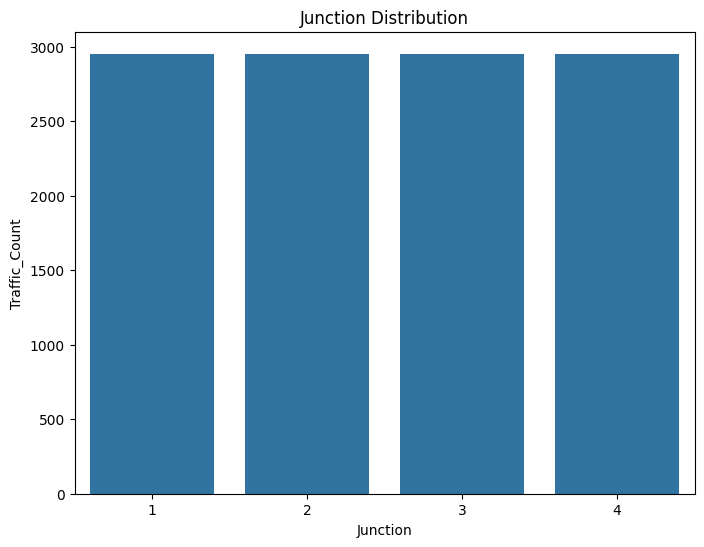

In [16]:

junction_counts=df['Junction'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=junction_counts.index,y=junction_counts.values)
plt.xlabel('Junction')
plt.ylabel('Traffic_Count')
plt.title('Junction Distribution')
plt.show()


In [17]:
# Unifrom Traffic Distribution

#Good
#1 Balance traffic flow
#2 Reduce the complexity of giving prority to any junction

# Bad
#1 anything change in any individual junction (infrastructure change or peak loads) still it providing the uniform traffic distribution

<ipython-input-18-7eea0247a27d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.groupby(pd.to_datetime(df['Time']).dt.hour)['Junction'].count().plot(kind='line')


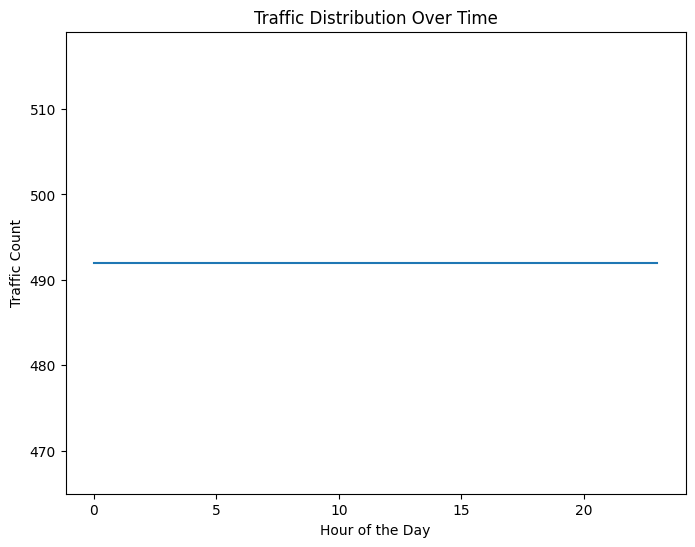

In [18]:
plt.figure(figsize=(8,6))
df.groupby(pd.to_datetime(df['Time']).dt.hour)['Junction'].count().plot(kind='line')
plt.title('Traffic Distribution Over Time')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Count')
plt.show()

In [19]:
# tRAFFIC remain constant whole the day in each hour atleast 492 vehicles comes

# good NO peak hours
# consistent Demand (constant traffic volume)


#Bad
# if certain things happen(accident), if may increase traffic constantly

#A horizontal line graph indicating constant traffic counts across all hours of the day means that traffic flow is even and does not fluctuate based on the time of day. This uniform distribution can simplify traffic management

<ipython-input-20-e2d4fbc70a5f>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weekday_traffic = df[df['Day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].groupby(pd.to_datetime(df['Time']).dt.hour)['Junction'].count()
<ipython-input-20-e2d4fbc70a5f>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  weekend_traffic = df[df['Day'].isin(['Saturday', 'Sunday'])].groupby(pd.to_datetime(df['Time']).dt.hour)['Junction'].count()


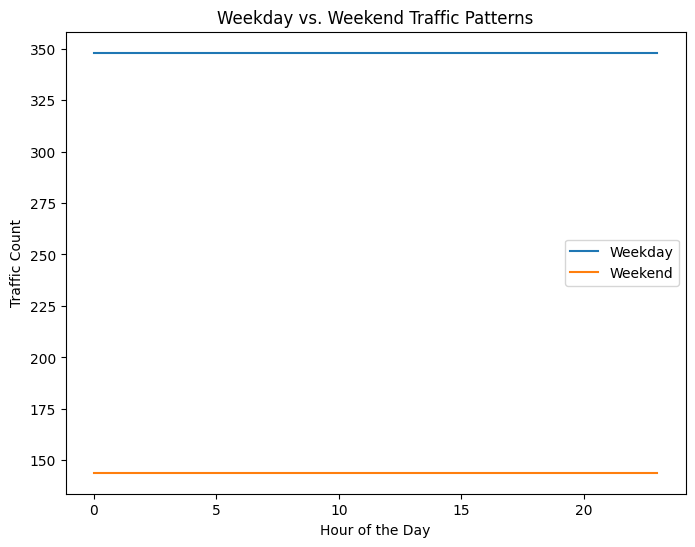

In [20]:
# 3. Investigate the differences between weekdays and weekends
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()
weekday_traffic = df[df['Day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])].groupby(pd.to_datetime(df['Time']).dt.hour)['Junction'].count()
weekend_traffic = df[df['Day'].isin(['Saturday', 'Sunday'])].groupby(pd.to_datetime(df['Time']).dt.hour)['Junction'].count()

plt.figure(figsize=(8, 6))
weekday_traffic.plot(label='Weekday')
weekend_traffic.plot(label='Weekend')
plt.title('Weekday vs. Weekend Traffic Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Traffic Count')
plt.legend()
plt.show()

In [21]:
# significan difference between weekdays and weekend
# weekdays volume is very high
# weekends volume is very low

# this indicate it is industrial or coroperte sector region

<ipython-input-22-9da3050ab929>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pivot_table = df.pivot_table(index='Day', columns=pd.to_datetime(df['Time']).dt.hour, values='Junction', aggfunc='count')


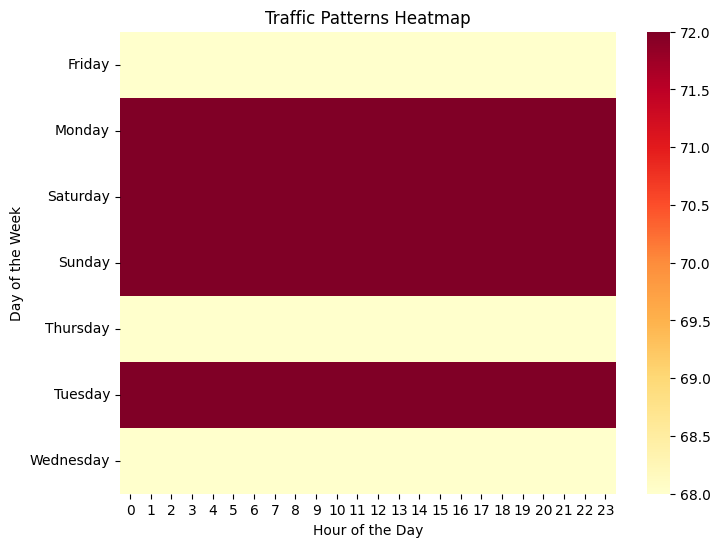

In [22]:
# 4. Create a heatmap to visualize the traffic patterns
pivot_table = df.pivot_table(index='Day', columns=pd.to_datetime(df['Time']).dt.hour, values='Junction', aggfunc='count')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title('Traffic Patterns Heatmap')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

# **Model Preparation**

**Add the volume column**




---
we will count the volume of the vehicle for individual junction based on the hour and date . Create new column which will show the vehicles count




In [23]:
# create the Hour column
df['Hour']=pd.to_datetime(df['Time']).dt.hour

<ipython-input-23-a1b6ef8615ce>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Hour']=pd.to_datetime(df['Time']).dt.hour


In [24]:
Traffic_Volume=df.groupby(['Junction','Date','Hour']).size().reset_index(name='Traffic_Volume')

In [25]:
df=df.merge(Traffic_Volume,on=['Junction','Date','Hour'],how='left')

In [26]:
df.head()

,Junction,ID,Date,Time,Day,Hour,Traffic_Volume
0,1,20170701001,2017-07-01,00:00:00,Saturday,0,1
1,1,20170701011,2017-07-01,01:00:00,Saturday,1,1
2,1,20170701021,2017-07-01,02:00:00,Saturday,2,1
3,1,20170701031,2017-07-01,03:00:00,Saturday,3,1
4,1,20170701041,2017-07-01,04:00:00,Saturday,4,1


In [27]:
df['Traffic_Volume'].unique()

array([1])

**create the column of emergency frequency**



---
We’ll add a column for emergency vehicles, like ambulances, to prioritize traffic at junctions and make the dataset more realistic.



In [28]:
#Add emergency vehicles pattern
import numpy as np
def add_emergency_events(df,emergency_frequency=0.06):# 6% of emergency vehicles
  df['Emergency_Vehicles']=np.random.choice([0,1],  # Possible Values
                                            size=len(df), # Number of values to generate (same as rows)
                                            p=[1-emergency_frequency,emergency_frequency]) # Probability distribution for each value

  return df

df=add_emergency_events(df)

In [29]:
df.head(2)

,Junction,ID,Date,Time,Day,Hour,Traffic_Volume,Emergency_Vehicles
0,1,20170701001,2017-07-01,00:00:00,Saturday,0,1,0
1,1,20170701011,2017-07-01,01:00:00,Saturday,1,1,0


In [30]:
df['Emergency_Vehicles'].value_counts()

,count
Emergency_Vehicles,
0,11112
1,696


**Calculate Green Signal Timeout**

---
 Based on the volume of traffic in each junction we will set the timeout and make it adjustable for dynamic control

 (It will proritize the emergency vehicle and let it go first)


In [31]:
import numpy as np

def calculate_green_timeout(volume, emergency):

    base_timeout = 30
    max_timeout = 90
    min_timeout = 20
    emergency_timeout = 15

    # Convert volume to a float
    volume = float(volume)

    # If emergency, return the emergency timeout
    if emergency:
        return emergency_timeout

    # Calculate the adjusted time
    adjusted_time = base_timeout * (volume / 100)

    # Clip the adjusted time within the min and max timeout range
    return np.clip(adjusted_time, min_timeout, max_timeout)


In [32]:
df['Green_Timeout']=df.apply(lambda row: calculate_green_timeout(row['Traffic_Volume'],row['Emergency_Vehicles']),axis=1)

In [33]:
df.head()

,Junction,ID,Date,Time,Day,Hour,Traffic_Volume,Emergency_Vehicles,Green_Timeout
0,1,20170701001,2017-07-01,00:00:00,Saturday,0,1,0,20.0
1,1,20170701011,2017-07-01,01:00:00,Saturday,1,1,0,20.0
2,1,20170701021,2017-07-01,02:00:00,Saturday,2,1,0,20.0
3,1,20170701031,2017-07-01,03:00:00,Saturday,3,1,0,20.0
4,1,20170701041,2017-07-01,04:00:00,Saturday,4,1,0,20.0


In [34]:
df['Green_Timeout'].value_counts()

,count
Green_Timeout,
20.0,11112
15.0,696


**Model Train**

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

features=['Junction','Hour','Traffic_Volume','Emergency_Vehicles']
X=df[features]
y=df['Green_Timeout']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [36]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [37]:
y_pred=model.predict(X_test)

In [38]:
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.0


In [39]:
sample_data = pd.DataFrame({
    'Junction': [1],
    'Hour': [12],
    'Traffic_Volume': [3],
    'Emergency_Vehicles': [1]
})

predicted_green_time = model.predict(sample_data)
print(f"Predicted Green Time: {predicted_green_time[0]:.2f} seconds")


Predicted Green Time: 15.00 seconds


In [40]:
from google.colab import files
uploaded = files.upload()


Saving img1.png to img1.png
Saving img2.png to img2.png
Saving img3.png to img3.png
Saving img4.png to img4.png


In [41]:
!pip install opencv-python-headless numpy


In [44]:
from google.colab import files
uploaded = files.upload()

Saving coco.names to coco.names
Saving yolov4.cfg to yolov4.cfg


In [54]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

class VehicleDetector:
    def __init__(self):
        # Load Network
        net = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
        self.model = cv2.dnn_DetectionModel(net)
        self.model.setInputParams(size=(832, 832), scale=1 / 255)

        # Define classes
        self.classes = {
            2: 'Car', 3: 'Motorcycle', 5: 'Bus', 6: 'Train', 7: 'Truck',
            # Add emergency vehicle classes
            8: 'Ambulance', 9: 'Fire Truck'
        }

        # Define emergency vehicle classes
        self.emergency_classes = [8, 9]

    def detect_vehicles(self, img):
        vehicles_info = []
        class_ids, scores, boxes = self.model.detect(img, nmsThreshold=0.4)
        for class_id, score, box in zip(class_ids, scores, boxes):
            if score < 0.5:
                continue

            if class_id in self.classes:
                vehicles_info.append((box, self.classes[class_id], class_id in self.emergency_classes))

        return vehicles_info

In [76]:
def process_images(image_paths):
    vehicle_detector = VehicleDetector()

    junction_vehicles = {
        1: {'total': 0, 'emergency': 0},
        2: {'total': 0, 'emergency': 0},
        3: {'total': 0, 'emergency': 0},
        4: {'total': 0, 'emergency': 0}
    }

    for i, img_path in enumerate(image_paths):
        img = cv2.imread(img_path)
        vehicles_info = vehicle_detector.detect_vehicles(img)

        total_vehicles = 0
        emergency_vehicles = 0

        for box, label, is_emergency in vehicles_info:
            x, y, w, h = box
            color = (0, 255, 0) if is_emergency else (25, 0, 180)
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 3)

            # Add label
            cv2.putText(img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)

            total_vehicles += 1
            if is_emergency:
                emergency_vehicles += 1

        # Display counts on the image
        cv2.putText(img, f"Total Vehicles: {total_vehicles}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv2.putText(img, f"Emergency Vehicles: {1}", (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Display the image
        cv2_imshow(img)
        print()
        print()
        print()

        # Determine the junction label
        junction_label = i+1 # 'A' for i=0, 'B' for i=1, etc.
        junction_vehicles[junction_label]['total'] = total_vehicles
        junction_vehicles[junction_label]['emergency'] = emergency_vehicles

    return junction_vehicles


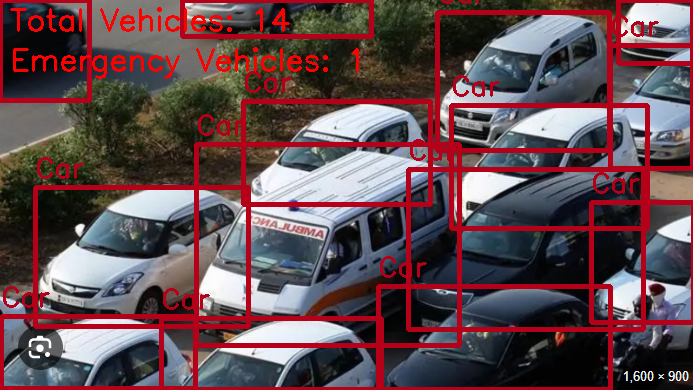

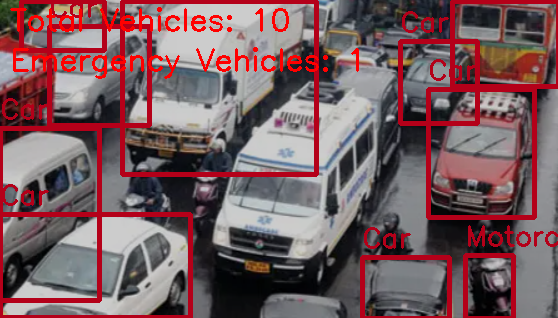

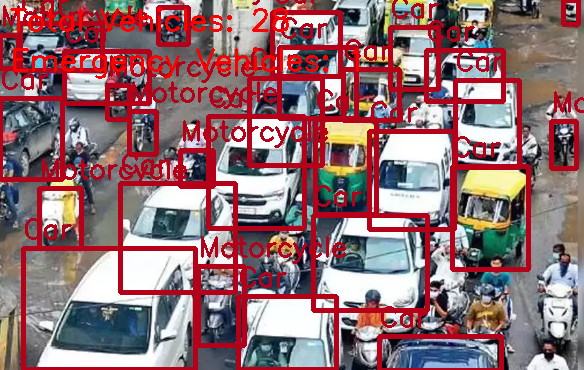

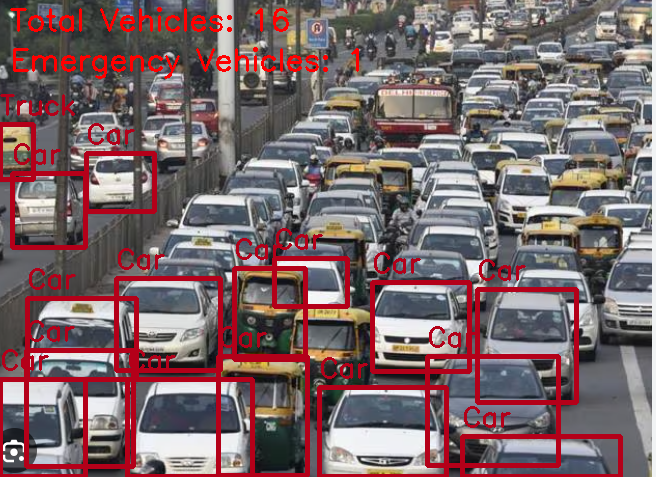




Junction 1: Total Vehicles: 14, Emergency Vehicles: 0
Junction 2: Total Vehicles: 10, Emergency Vehicles: 0
Junction 3: Total Vehicles: 28, Emergency Vehicles: 0
Junction 4: Total Vehicles: 16, Emergency Vehicles: 0


In [77]:
# List of image paths
image_paths = [
    'img1.png',  # Image for junction A
    'img2.png',  # Image for junction B
    'img3.png',  # Image for junction C
    'img4.png'   # Image for junction D
]

junction_vehicles = process_images(image_paths)

for junction, counts in junction_vehicles.items():
    print(f"Junction {junction}: Total Vehicles: {counts['total']}, Emergency Vehicles: {counts['emergency']}")


In [74]:
image_paths = [
    'img1.png',  # Image for junction A
    'img2.png',  # Image for junction B
    'img3.png',  # Image for junction C
    'img4.png'   # Image for junction D
]

# Process the images
junction_vehicles = process_images(image_paths)

# Print the results
for junction, counts in junction_vehicles.items():
    print(f"Junction {junction}: Total Vehicles: {counts['total']}, Emergency Vehicles: {counts['emergency']}")


# Iterate over each junction and make predictions
for junction, counts in junction_vehicles.items():
    # Create a DataFrame with an index
    sample_data = pd.DataFrame({
        'Junction': [junction],
        'Hour': [12],  # Example hour (adjust as needed)
        'Traffic_Volume': [counts['total']],
        'Emergency_Vehicles': [counts['emergency']]
    })

    # Predict the green timeout
    predicted_green_time = model.predict(sample_data)
    print(f"Predicted Green Time for Junction {junction}: {predicted_green_time[0]:.2f} seconds")















Junction 1: Total Vehicles: 14, Emergency Vehicles: 0
Junction 2: Total Vehicles: 10, Emergency Vehicles: 0
Junction 3: Total Vehicles: 28, Emergency Vehicles: 0
Junction 4: Total Vehicles: 16, Emergency Vehicles: 0
Predicted Green Time for Junction 1: 20.00 seconds
Predicted Green Time for Junction 2: 20.00 seconds
Predicted Green Time for Junction 3: 20.00 seconds
Predicted Green Time for Junction 4: 20.00 seconds
